# Electric Vehicles Sales Analysis

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
#import dataset
df = pd.read_csv(r'EV.csv')

### Exploratory Data Analysis

In [22]:
#top 5 rows
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7.0,0.0,7.0,460.0,467.0,1.50
1,December 31 2022,Prince William,VA,Passenger,1.0,2.0,3.0,188.0,191.0,1.57
2,January 31 2020,Dakota,MN,Passenger,0.0,1.0,1.0,32.0,33.0,3.03
3,June 30 2022,Ferry,WA,Truck,0.0,0.0,0.0,3575.0,3575.0,0.00
4,July 31 2021,Douglas,CO,Passenger,0.0,1.0,1.0,83.0,84.0,1.19


In [23]:
#Size
df.shape

(20819, 10)

In [24]:
#Details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  float64
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  float64
 6   Electric Vehicle (EV) Total               20819 non-null  float64
 7   Non-Electric Vehicle Total                20819 non-null  float64
 8   Total Vehicles                            20819 non-null  float64
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(6), object(4)
memory us

In [26]:
#null values
df.isnull().sum()

Date                                         0
County                                      86
State                                       86
Vehicle Primary Use                          0
Battery Electric Vehicles (BEVs)             0
Plug-In Hybrid Electric Vehicles (PHEVs)     0
Electric Vehicle (EV) Total                  0
Non-Electric Vehicle Total                   0
Total Vehicles                               0
Percent Electric Vehicles                    0
dtype: int64

In [27]:
df.dropna(inplace = True)

In [28]:
df.isnull().sum()

Date                                        0
County                                      0
State                                       0
Vehicle Primary Use                         0
Battery Electric Vehicles (BEVs)            0
Plug-In Hybrid Electric Vehicles (PHEVs)    0
Electric Vehicle (EV) Total                 0
Non-Electric Vehicle Total                  0
Total Vehicles                              0
Percent Electric Vehicles                   0
dtype: int64

In [30]:
#dataset Statistics
df.describe()

,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
count,20733.000000,20733.000000,20733.000000,2.073300e+04,2.073300e+04,20733.000000
mean,218.400473,80.391164,298.791637,2.520065e+04,2.549944e+04,4.150036
std,2283.212851,647.692406,2921.484707,1.069417e+05,1.093000e+05,11.076931
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000
25%,0.000000,0.000000,1.000000,4.300000e+01,4.400000e+01,0.390000
50%,1.000000,1.000000,1.000000,1.600000e+02,1.630000e+02,1.220000
75%,3.000000,2.000000,4.000000,8.475000e+03,8.488000e+03,3.030000
max,72333.000000,17501.000000,89834.000000,1.399823e+06,1.430937e+06,100.000000


In [35]:
#Check Duplicate
duplicate_rows = df.duplicated()
print(df[duplicate_rows])

Empty DataFrame
Columns: [Date, County, State, Vehicle Primary Use, Battery Electric Vehicles (BEVs), Plug-In Hybrid Electric Vehicles (PHEVs), Electric Vehicle (EV) Total, Non-Electric Vehicle Total, Total Vehicles, Percent Electric Vehicles]
Index: []


In [46]:
#Segregating Year and Month Column
df['Year']=df['Date'].str[-4:]
df['Month']=df['Date'].str.split(' ').str[0]
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,Year,Month
0,September 30 2022,Riverside,CA,Passenger,7.0,0.0,7.0,460.0,467.0,1.50,2022,September
1,December 31 2022,Prince William,VA,Passenger,1.0,2.0,3.0,188.0,191.0,1.57,2022,December
2,January 31 2020,Dakota,MN,Passenger,0.0,1.0,1.0,32.0,33.0,3.03,2020,January
3,June 30 2022,Ferry,WA,Truck,0.0,0.0,0.0,3575.0,3575.0,0.00,2022,June
4,July 31 2021,Douglas,CO,Passenger,0.0,1.0,1.0,83.0,84.0,1.19,2021,July


In [49]:
# Renaming the State column header
df.rename(columns={'County': 'City'}, inplace=True)
df.head()

,Date,City,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,Year,Month
0,September 30 2022,Riverside,CA,Passenger,7.0,0.0,7.0,460.0,467.0,1.50,2022,September
1,December 31 2022,Prince William,VA,Passenger,1.0,2.0,3.0,188.0,191.0,1.57,2022,December
2,January 31 2020,Dakota,MN,Passenger,0.0,1.0,1.0,32.0,33.0,3.03,2020,January
3,June 30 2022,Ferry,WA,Truck,0.0,0.0,0.0,3575.0,3575.0,0.00,2022,June
4,July 31 2021,Douglas,CO,Passenger,0.0,1.0,1.0,83.0,84.0,1.19,2021,July


# Top 10 States with most vehicles

In [62]:
#excluding washington data for too high value
filtered_df = df[df['State'] != 'WA']

df1 = filtered_df.groupby('State')['Total Vehicles'].sum().sort_values(ascending = False).head(10)
df1

State
CA    626762.0
VA    247289.0
TX    186107.0
AZ    157198.0
OR    120144.0
MD    106305.0
FL    101112.0
CO     81570.0
NC     69717.0
NV     60725.0
Name: Total Vehicles, dtype: float64

In [54]:
sns.set()

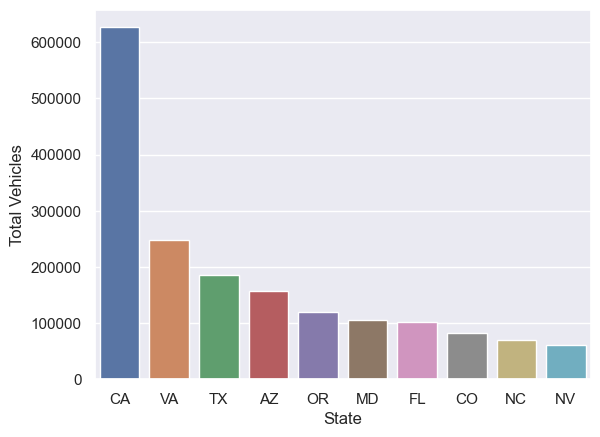

In [67]:
sns.barplot(x  = df1.index,y=df1.values)
plt.ylabel('Total Vehicles')
plt.show()

# Year wise Vehicles registered

In [71]:
df2 = df.groupby('Year')['Total Vehicles'].sum()
df2

Year
2017    71648609.0
2018    72768433.0
2019    74122131.0
2020    74592015.0
2021    75173700.0
2022    74534741.0
2023    73829024.0
2024    12011299.0
Name: Total Vehicles, dtype: float64

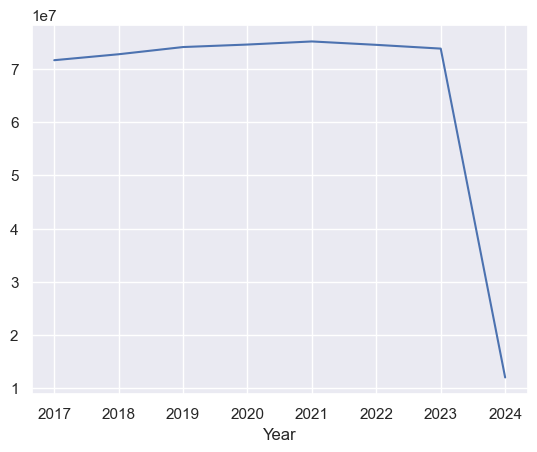

In [74]:
df2.plot()
plt.show()

# Top 5 cities with highest EVs

In [79]:
df3 = df.groupby('City')['Electric Vehicle (EV) Total'].sum().sort_values(ascending = False).head(5)
df3

City
King         3309850.0
Snohomish     683598.0
Pierce        456003.0
Clark         351317.0
Kitsap        214711.0
Name: Electric Vehicle (EV) Total, dtype: float64

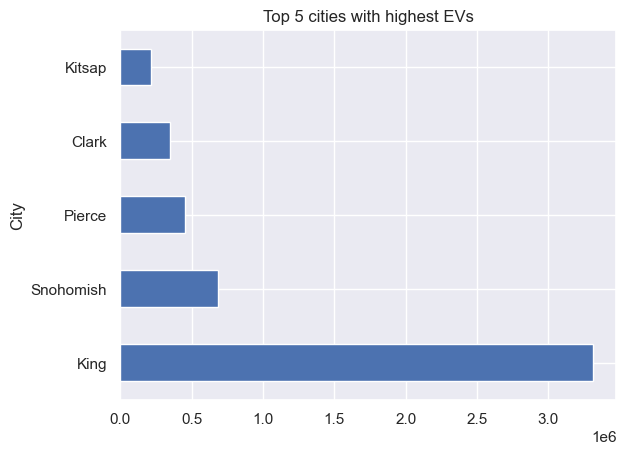

In [81]:
df3.plot(kind=  'barh')
plt.title('Top 5 cities with highest EVs')
plt.show()

# Vehicle Primary Use

In [84]:
df4 = df['Vehicle Primary Use'].value_counts()
df4

Vehicle Primary Use
Passenger    17291
Truck         3442
Name: count, dtype: int64

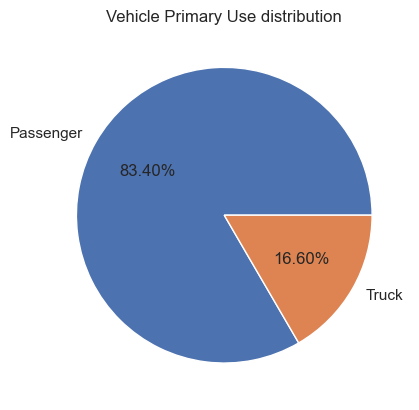

In [88]:
df4.plot(kind = 'pie', autopct = '%1.2f%%')
plt.ylabel(None)
plt.title('Vehicle Primary Use distribution')
plt.show()

# Electric Vehicle (EV) Total	Non-Electric Vehicle Total

In [90]:
df[['Electric Vehicle (EV) Total','Non-Electric Vehicle Total']]

,Electric Vehicle (EV) Total,Non-Electric Vehicle Total
0,7.0,460.0
1,3.0,188.0
2,1.0,32.0
3,0.0,3575.0
4,1.0,83.0
...,...,...
20814,1.0,14.0
20815,1.0,10.0
20816,1094.0,62257.0
20817,16.0,2724.0


In [100]:
#Total
ev_total_sum = df['Electric Vehicle (EV) Total'].sum()
non_ev_total_sum = df['Non-Electric Vehicle Total'].sum()

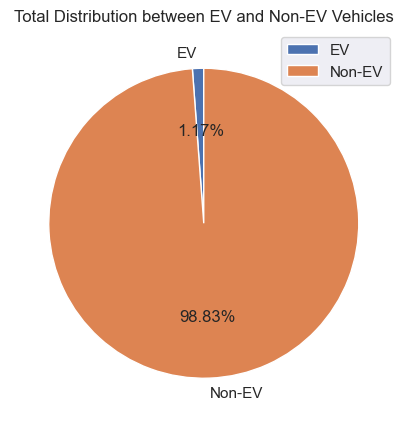

In [114]:
total_distribution = pd.DataFrame({
    'Vehicle Type': ['EV', 'Non-EV'],
    'Total Sum': [ev_total_sum, non_ev_total_sum]
})
total_distribution.plot.pie(y='Total Sum', labels=total_distribution['Vehicle Type'], autopct='%1.2f%%', startangle=90, figsize=(5 , 6))
plt.title('Total Distribution between EV and Non-EV Vehicles')
plt.ylabel(None)
plt.show()

# Electric Vehicle (EV) % distribution

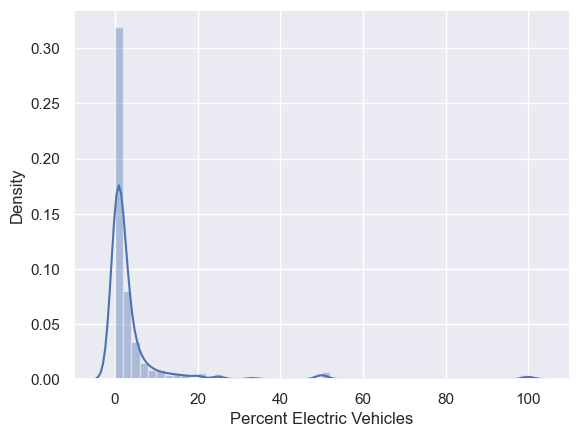

In [140]:
sns.distplot(df['Percent Electric Vehicles'])
plt.show()

# Distribution between Battery Electric Vehicles (BEVs)	Plug-In Hybrid Electric Vehicles (PHEVs)

In [143]:
df[['Battery Electric Vehicles (BEVs)','Plug-In Hybrid Electric Vehicles (PHEVs)']]

,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs)
0,7.0,0.0
1,1.0,2.0
2,0.0,1.0
3,0.0,0.0
4,0.0,1.0
...,...,...
20814,1.0,0.0
20815,1.0,0.0
20816,744.0,350.0
20817,14.0,2.0


In [144]:
#Total
BEV = df['Battery Electric Vehicles (BEVs)'].sum()
PHEV = df['Plug-In Hybrid Electric Vehicles (PHEVs)'].sum()

In [147]:
ev_dist = pd.DataFrame({
    'EV Type': ['BEV', 'PHEV'],
    'Total Sum': [BEV, PHEV]})

ev_dist

,EV Type,Total Sum
0,BEV,4528097.0
1,PHEV,1666750.0


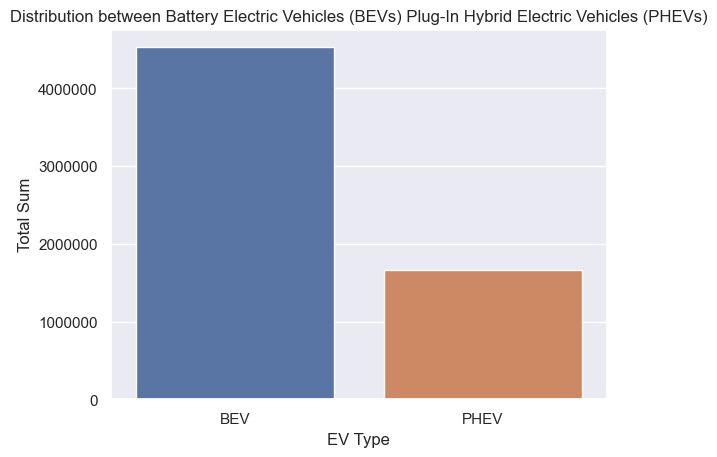

In [155]:
ax = sns.barplot(x ='EV Type', y='Total Sum', data = ev_dist )
ax.ticklabel_format(style='plain', axis='y')
plt.title('Distribution between Battery Electric Vehicles (BEVs) Plug-In Hybrid Electric Vehicles (PHEVs)')
plt.show()